# Exercise 5

# Problem 1

## Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#Tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

sb.set()

## Importing training dataset

In [2]:
trainData = pd.read_csv('train.csv')
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Problem 1: Predicting CentralAir using SalePrice

### a) Create appropriate datasets for Train and Test in an 75:25 ratio and fit two Classification Tree models (of max depth 3 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

#### First let's plot the Swarmplot for SalePrice and CentralAir just to have a general idea of these two variables.

<Axes: xlabel='SalePrice', ylabel='CentralAir'>

C:\Users\chins\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


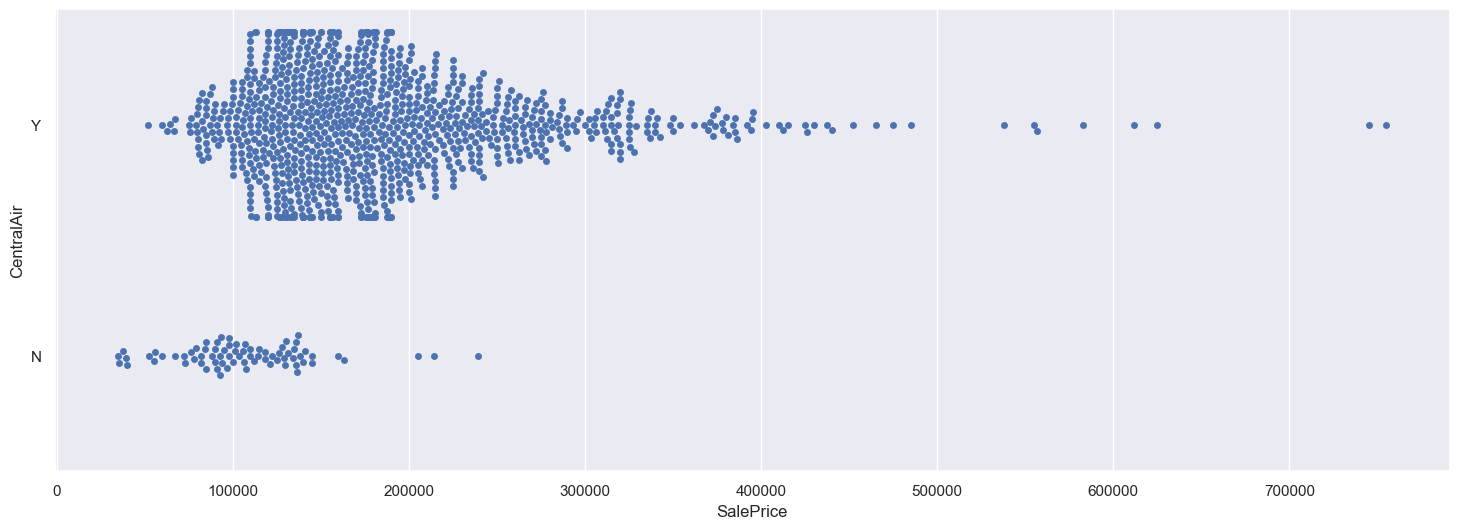

In [3]:
# extract CentralAir and SalePrice dataframe
SalePrice = pd.DataFrame(trainData['SalePrice'])
CentralAir = pd.DataFrame(trainData['CentralAir'])

# split the CentralAir and SalePrice dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(SalePrice, CentralAir, test_size = 0.25, random_state=4)

# Combining SalePrice and CentralAir into 1 dataframe
trainDF = pd.concat([x_train, y_train], axis = 1).reindex(x_train.index)

# Joint Swarmplot of SalePrice train data against CentralAir train data
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

#### We now proceed to create the tree for each case using train data

[Text(0.45689655172413796, 0.9, 'SalePrice <= 107450.0\ngini = 0.126\nsamples = 1095\nvalue = [74, 1021]\nclass = Y'),
 Text(0.1896551724137931, 0.7, 'SalePrice <= 57996.5\ngini = 0.462\nsamples = 116\nvalue = [42, 74]\nclass = Y'),
 Text(0.06896551724137931, 0.5, 'SalePrice <= 46000.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = N'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = N'),
 Text(0.10344827586206896, 0.3, 'SalePrice <= 52250.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = N'),
 Text(0.06896551724137931, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.13793103448275862, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(0.3103448275862069, 0.5, 'SalePrice <= 105950.0\ngini = 0.434\nsamples = 107\nvalue = [34, 73]\nclass = Y'),
 Text(0.2413793103448276, 0.3, 'SalePrice <= 98150.0\ngini = 0.418\nsamples = 101\nvalue = [30, 71]\nclass = Y'),
 Text(0.20689655172413793, 0.1, 'gini = 0.464\nsamples

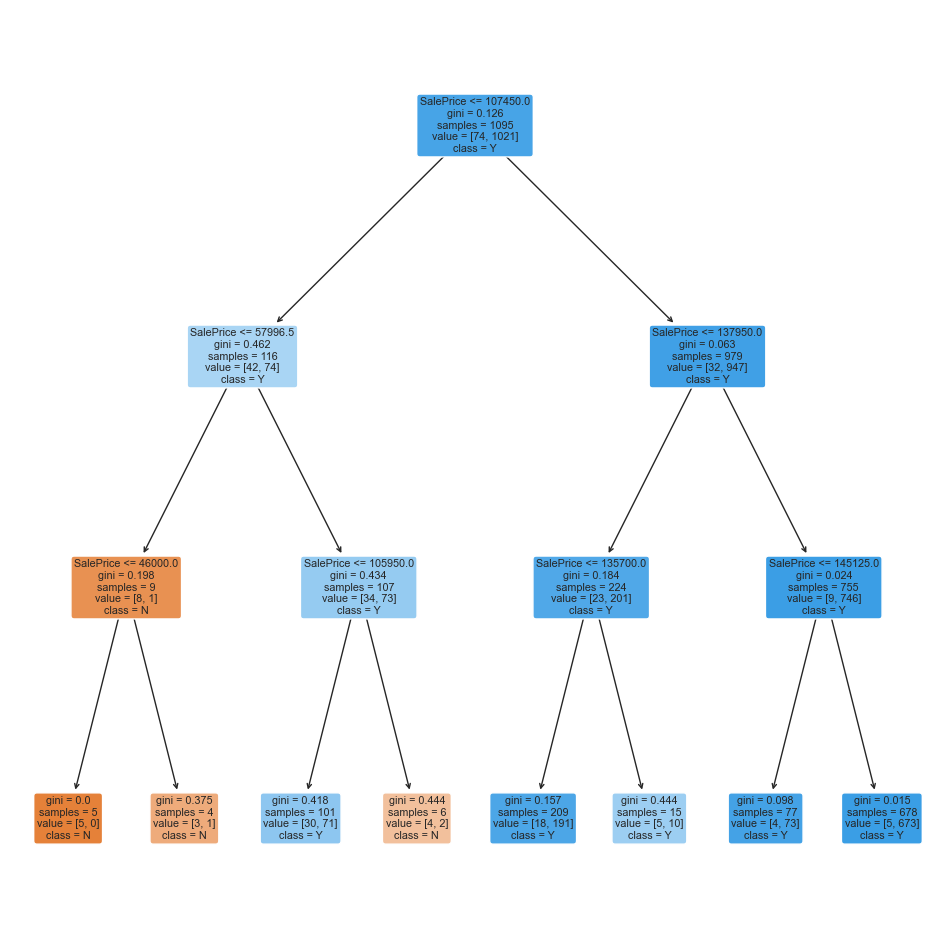

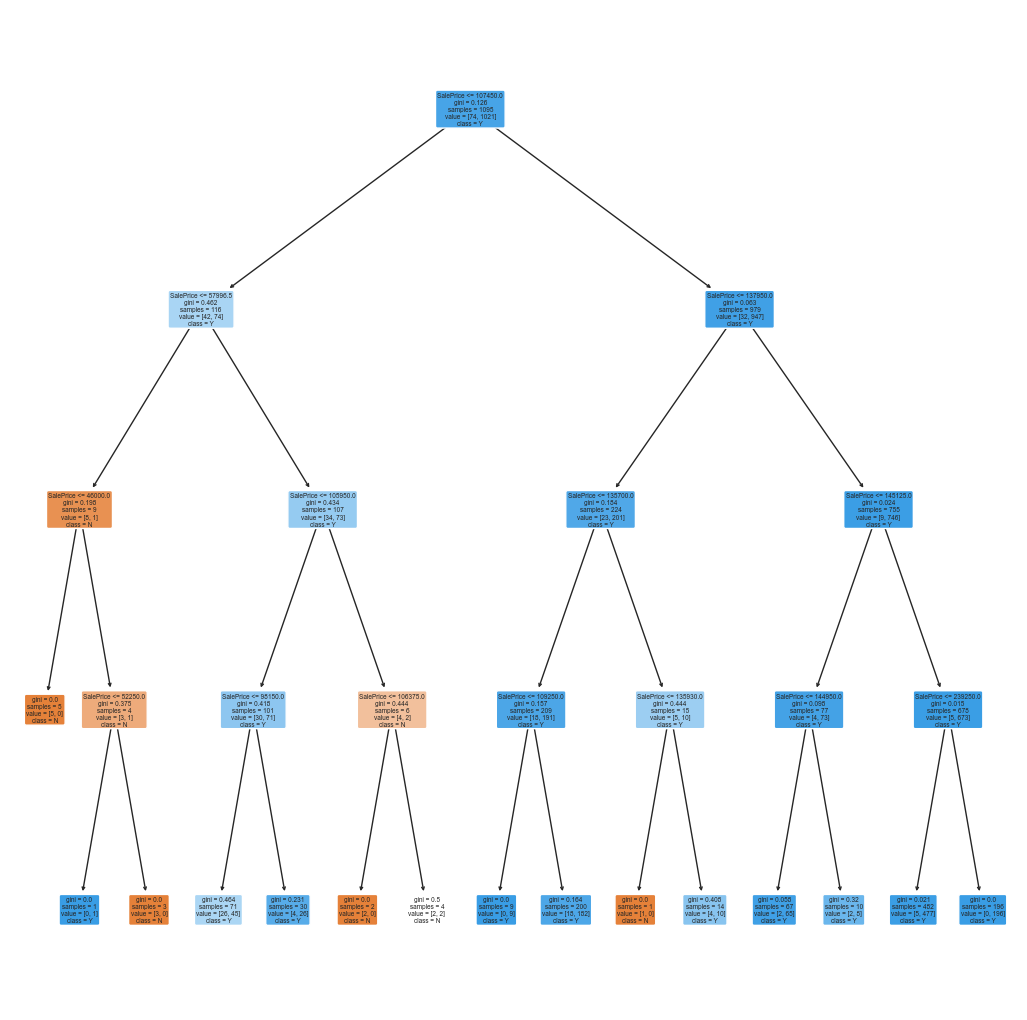

In [4]:
#decision tree using train data
#tree1 with max depth of 3
tree1 = DecisionTreeClassifier(max_depth=3)
tree1.fit(x_train, y_train)

f = plt.figure(figsize=(12,12))

#Ploting tree1 with depth 3
plot_tree(tree1, filled=True, rounded=True, feature_names=["SalePrice"], 
          class_names=["N","Y"])

#----------------------------------------------

#tree2 with max depth of 4
tree2 = DecisionTreeClassifier(max_depth=4)    
tree2.fit(x_train, y_train)

f = plt.figure(figsize=(13,13))

#Ploting tree2 with depth 4
plot_tree(tree2, filled=True, rounded=True, feature_names=["SalePrice"], 
          class_names=["N","Y"])

#### b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

<Axes: >

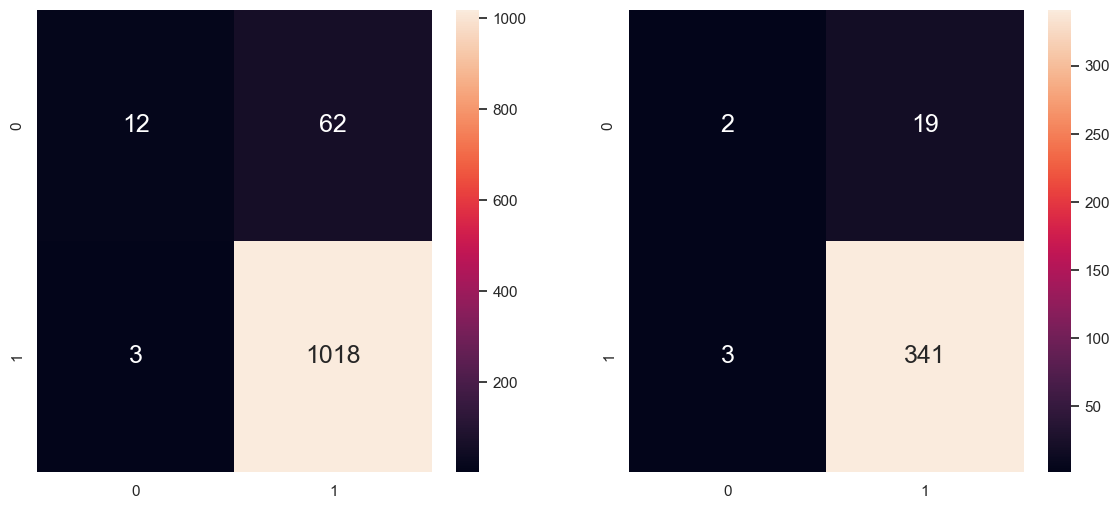

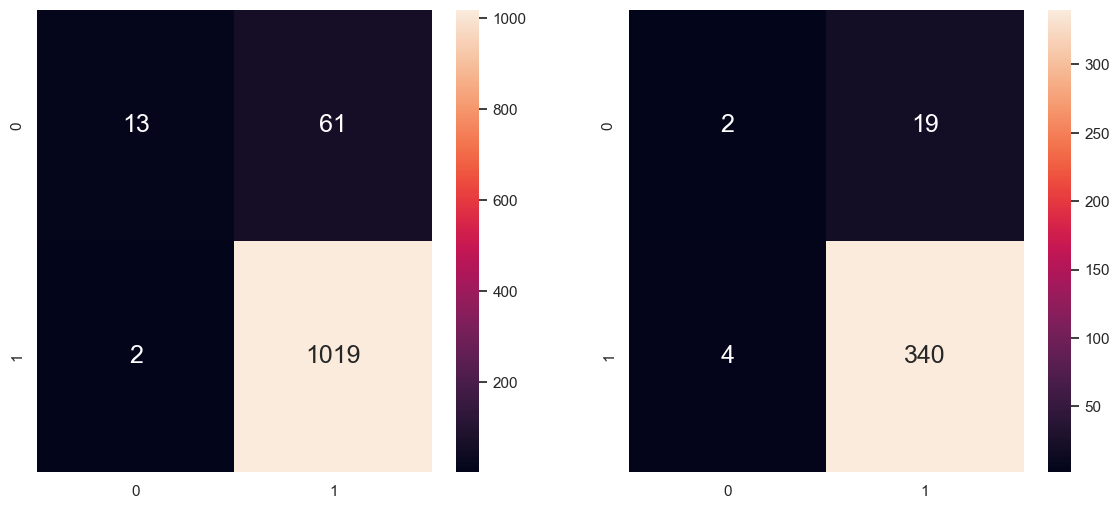

In [5]:
# tree1 Model
y_train_predFirst = tree1.predict(x_train)
y_test_predFirst = tree1.predict(x_test)

# tree1 Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(14, 6))
sb.heatmap(confusion_matrix(y_train, y_train_predFirst),annot = True, fmt=".0f",
           annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_predFirst), annot = True, fmt=".0f",
           annot_kws={"size": 18}, ax = axes[1])

#---------------------------------------------------------

# tree2 Model
y_train_predSecond = tree2.predict(x_train)
y_test_predSecond = tree2.predict(x_test)

# tree2 Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(14, 6))
sb.heatmap(confusion_matrix(y_train, y_train_predSecond), annot = True, fmt=".0f",
           annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_predSecond),annot = True, fmt=".0f",
           annot_kws={"size": 18}, ax = axes[1])


#Top left: Tree 1 (Train)
#Top right: Tree 1 (Test)
#Bottom left: Tree 2 (Train)
#Bottom left: Tree 2 (Test)

#### From this, we can compare the top left(model 1 training data) and bottom left (model 2 training data) matrix, where model 2 has slightly more true positive entries, and a few less false negative. This kind of already hints to us that model 2 might be better, but let us confirm.

#### I have created a function for easier calculation of the True Positive Rate (TPR) and False Positive Rate (FPR)

In [6]:
# function to print TN, FN, TP, FP for a binary classification
def tprAndfpr(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0][0] #Top left
    fn = cm[1][0] #Bottom Left
    fp = cm[0][1] #Top Right
    tp = cm[1][1] #Bottom Right
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr


[tpr1_train, fpr1_train] = tprAndfpr(y_train, y_train_predFirst)
[tpr1_test, fpr1_test] = tprAndfpr(y_test, y_test_predFirst)
[tpr2_train, fpr2_train] = tprAndfpr(y_train, y_train_predSecond)
[tpr2_test, fpr2_test] = tprAndfpr(y_test, y_test_predSecond)

In [7]:
# tree1 -> model1 (max_depth 3)
print('Model 1 (max_depth: 3)')
print("Classification Accuracy in train data \t:",tree1.score(x_train, y_train))
print("Classification Accuracy in test data \t:",tree1.score(x_test, y_test))
print("TPR (train)\t:", [tpr1_train, fpr1_train][0])
print("FPR (train)\t:", [tpr1_train, fpr1_train][1])

print("TPR (test)\t:", [tpr1_test, fpr1_test][0])
print("FPR (test)\t:", [tpr1_test, fpr1_test][1])

print()

#--------------------------------------------------------------------

# tree2 -> model2 (max_depth 4)
print('Model 2 (max_depth: 4)')
print("Classification Accuracy in train data \t:",tree2.score(x_train, y_train))
print("Classification Accuracy in test data \t:",tree2.score(x_test, y_test))

print("TPR (train)\t:", [tpr2_train, fpr2_train][0])
print("FPR (train)\t:", [tpr2_train, fpr2_train][1])

print("TPR (test)\t:", [tpr2_test, fpr2_test][0])

print("FPR (test)\t:", [tpr2_test, fpr2_test][1])

Model 1 (max_depth: 3)
Classification Accuracy in train data 	: 0.9406392694063926
Classification Accuracy in test data 	: 0.9397260273972603
TPR (train)	: 0.9970617042115573
FPR (train)	: 0.8378378378378378
TPR (test)	: 0.9912790697674418
FPR (test)	: 0.9047619047619048

Model 2 (max_depth: 4)
Classification Accuracy in train data 	: 0.9424657534246575
Classification Accuracy in test data 	: 0.936986301369863
TPR (train)	: 0.9980411361410382
FPR (train)	: 0.8243243243243243
TPR (test)	: 0.9883720930232558
FPR (test)	: 0.9047619047619048


#### Based on the classification accurary, regarding train data, model 2 does slighty better than model 1. Regarding the test data, they are the same value. Based on the TPR and FPR results for train, the difference here is that model 2 has higher TPR and lower FPR, this implies that there are more true positives and less false positives, which is a good thing. For the FPR and TPR for test, they are about the same. Hence i can conclude model 2 is better.

### Problem 2 : Predicting CentralAir using Other Variables

#### Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 3) to predict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor.

In [8]:
OverallQual = pd.DataFrame(trainData['OverallQual'])
YearBuilt = pd.DataFrame(trainData['YearBuilt'])

####  I have written a function to perform classification on variables in a given dataset

OverallQual Vs. CentralAir

Goodness of Fit of Model (Train)
Classification Accuracy 	: 0.9415525114155251

Goodness of Fit of Model (Test)
Classification Accuracy 	: 0.9342465753424658

TPR (train)	: 0.994157740993184
FPR (train)	: 0.8529411764705882
TPR (test)	: 0.9911242603550295
FPR (test)	: 0.7777777777777778

------------------------------------------------------

MYearBuilt Vs. CentralAir

Goodness of Fit of Model (Train)
Classification Accuracy 	: 0.9378995433789954

Goodness of Fit of Model (Test)
Classification Accuracy 	: 0.9232876712328767

TPR (train)	: 0.9931439764936337
FPR (train)	: 0.8243243243243243
TPR (test)	: 0.9738372093023255
FPR (test)	: 0.9047619047619048



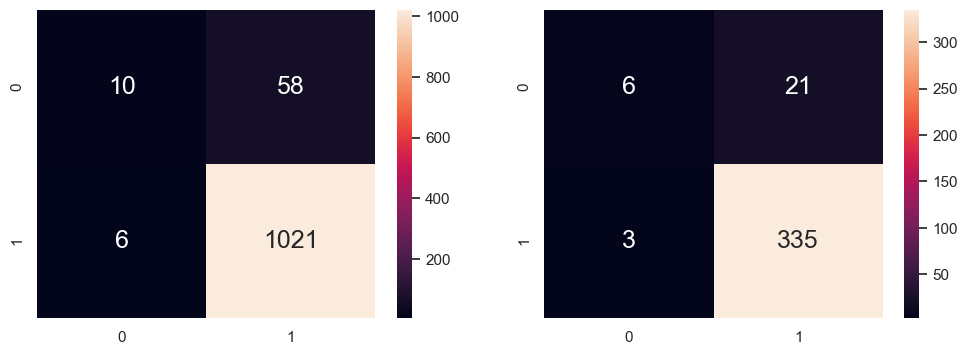

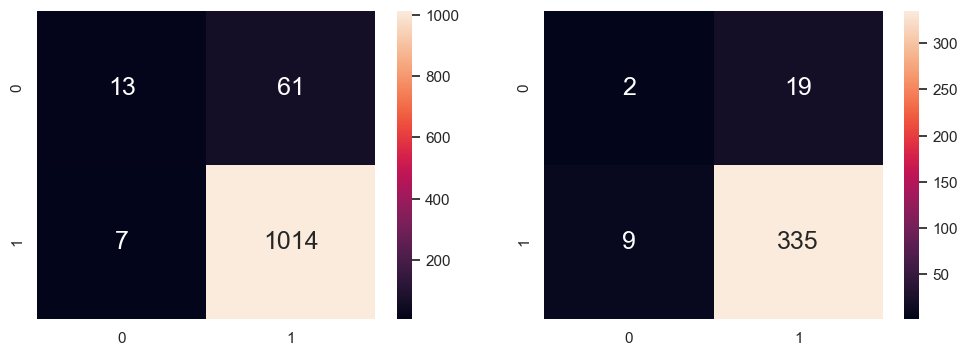

In [9]:
def classification(predict, response):
    # spliting the dataset into train and test
    x_train, x_test, y_train, y_test = train_test_split(predict, response, test_size=0.25)
    
    # creating a decision tree via train data
    decisionTree = DecisionTreeClassifier(max_depth=3)
    decisionTree.fit(x_train, y_train)
    
    # predict response corresponding to predictors
    y_train_pred = decisionTree.predict(x_train)
    y_test_pred = decisionTree.predict(x_test)
    
    # Checking Goodness of Fit for train data
    print("Goodness of Fit of Model (Train)")
    print("Classification Accuracy \t:", decisionTree.score(x_train, y_train))
    print()
    
    # Check the Goodness of Fit for test data)
    print("Goodness of Fit of Model (Test)")
    print("Classification Accuracy \t:", decisionTree.score(x_test, y_test))
    print()
    
    
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    # Confusion Matrix for Test
    sb.heatmap(
        confusion_matrix(y_train, y_train_pred),
        annot=True,
        fmt=".0f",
        annot_kws={"size": 18},
        ax=axes[0],
    )
    
    # Confusion Matrix for Test
    sb.heatmap(
        confusion_matrix(y_test, y_test_pred),
        annot=True,
        fmt=".0f",
        annot_kws={"size": 18},
        ax=axes[1],
    )
    
    # TPrs and FPRs
    [tpr_train, fpr_train] = tprAndfpr(y_train, y_train_pred)
    [tpr_test, fpr_test] = tprAndfpr(y_test, y_test_pred)
    print("TPR (train)\t:", [tpr_train, fpr_train][0])
    print("FPR (train)\t:", [tpr_train, fpr_train][1])
    print("TPR (test)\t:", [tpr_test, fpr_test][0])
    print("FPR (test)\t:", [tpr_test, fpr_test][1])

#-----------------------------------------------------------------------------
    
print("OverallQual Vs. CentralAir")
print()
classification(OverallQual, CentralAir)
print()
print("------------------------------------------------------")
print()
print("MYearBuilt Vs. CentralAir")
print()
classification(YearBuilt, CentralAir)
print()

#### For Classification Accuracy, we could observe that the OverallQual model has higher accuracy for both train and test as compared to the YearBuilt Model. For the TPRs and FPRs for train, they are about the same. For the TPRs and FPRs for test, model 1 does alot better than model 2.  Hence we can conclude that OverallQual model outperforms the YearBuilt model.

### Problem 3 : Understanding the Misclassified Samples

#### (a) Print the Classification Tree of max depth 3 that you fit in Problem 1(a). Note that each leaf node of your tree represents a specific partition of your training data, based on certain conditions given by the splits in the tree. Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.

[Text(0.5, 0.875, 'SalePrice <= 107450.0\ngini = 0.126\nsamples = 1095\nvalue = [74, 1021]\nclass = Y'),
 Text(0.25, 0.625, 'SalePrice <= 57996.5\ngini = 0.462\nsamples = 116\nvalue = [42, 74]\nclass = Y'),
 Text(0.125, 0.375, 'SalePrice <= 46000.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = N'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = N'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = N'),
 Text(0.375, 0.375, 'SalePrice <= 105950.0\ngini = 0.434\nsamples = 107\nvalue = [34, 73]\nclass = Y'),
 Text(0.3125, 0.125, 'gini = 0.418\nsamples = 101\nvalue = [30, 71]\nclass = Y'),
 Text(0.4375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = N'),
 Text(0.75, 0.625, 'SalePrice <= 137950.0\ngini = 0.063\nsamples = 979\nvalue = [32, 947]\nclass = Y'),
 Text(0.625, 0.375, 'SalePrice <= 135700.0\ngini = 0.184\nsamples = 224\nvalue = [23, 201]\nclass = Y'),
 Text(0.5625, 0.125, 'gini = 0.157\nsamples = 209\nvalue = [18, 191

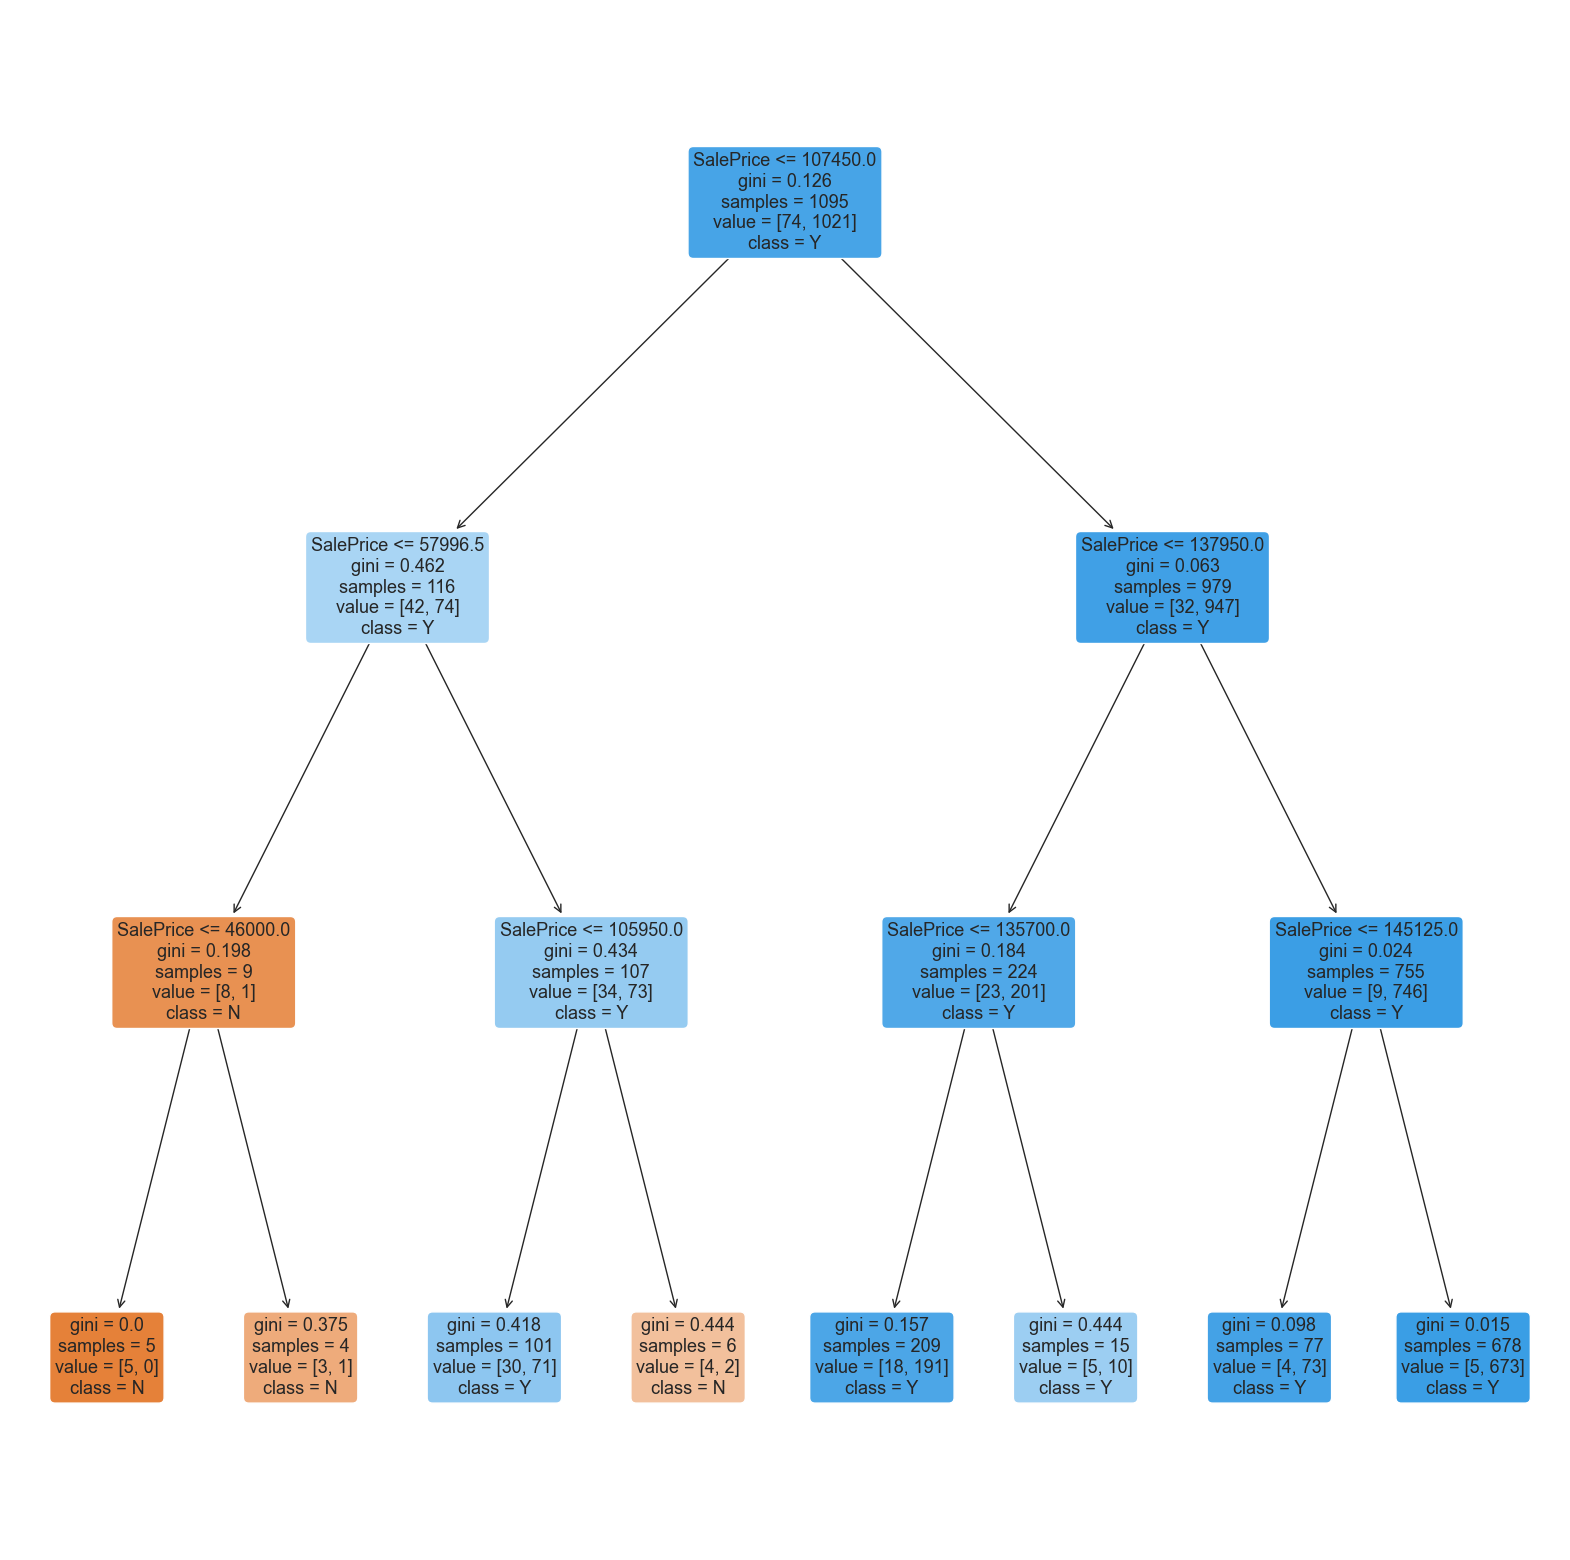

In [10]:
# extract relevant dataframes
SalePrice = pd.DataFrame(trainData['SalePrice'])
CentralAir = pd.DataFrame(trainData['CentralAir'])

# split the CentralAir and SalePrice dataset into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(SalePrice, CentralAir, test_size = 0.25, random_state=4)

f = plt.figure(figsize=(20,20))
plot_tree(tree1, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])

#### FP means that its supposed to be false but it is predicted as true, according to the diagram, from left to right, Leaf 3 has the highest number of FPs in the training data set, its condition is SalePrice > 57996.5 and SalePrice <=105950.0

In [13]:
# Create a joint dataframe by concatenating SalePrice and CentralAir
jointDf = pd.concat([X_train, Y_train], axis = 1).reindex(X_train.index)

leaf3 = jointDf[(jointDf['SalePrice']>57996.5) & (jointDf['SalePrice']<=105950.0)]
leaf3

,SalePrice,CentralAir
620,67000,N
1039,80000,Y
127,87000,Y
837,100000,Y
462,62383,Y
...,...,...
198,104000,Y
729,103000,Y
1185,104900,Y
393,100000,Y


#### b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a).

In [15]:
leaf3_false = leaf3[(leaf3['CentralAir'] != 'Y')]
leaf3_false
leaf3_false.shape[0]

30